---
기계학습활용 중간고사

202014107 경제학부 강신성

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn.impute
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.linear_model
import sklearn.tree
from autogluon.tabular import TabularDataset, TabularPredictor
from plotnine import *

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_train = pd.read_csv(".\\data\\train.csv")
df_test = pd.read_csv(".\\data\\test.csv")

In [16]:
(df_train.Survived == (df_train.Sex == 'female')*1).mean()

0.7867564534231201

## 1. True or False

\- 답

1. X
2. X
3. O

---

4. O
5. X
6. O
7. X

---

8. O
9. O
10. O

---

11. X
12. O
13. O
14. O

---

15. O
16. X
17. X
18. O
19. O

---

20. O
21. O
22. O
23. O
24. X

---

25. O
26. O

---

27. O
28. O
29. O
30. X
31. O
32. O
33. O

---

34. X
35. X
36. O
37. X
38. O

---

39. X
40. O
41. O
42. X

---

43. X
44. X

---

45. O
46. O
47. O

---

48. O
49. X
50. O

\- DataFrame

In [17]:
pd.DataFrame([0,0,1,1,0,1,0,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1], columns = ['Answer']).reset_index()\
.rename({'index' : 'Prob'}, axis = 1).assign(Prob = lambda _df : _df.Prob + 1)

,Prob,Answer
0,1,0
1,2,0
2,3,1
3,4,1
4,5,0
5,6,1
6,7,0
7,8,1
8,9,1
9,10,1


## 2 자료분석

`(1)` 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [18]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_test.csv')

**세부지침**

1.  반응변수 ${\bf y}$를 `sales`로 설정하고 나머지는 설명변수로
    설정하라.
2.  `df_test`에 `sales`에 대한 예측값을 포함하는 열을 추가하라.

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    280 non-null    float64
 1   type    280 non-null    object 
 2   sales   280 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.7+ KB


In [21]:
df_train

,temp,type,sales
0,19.4,choco,64.807407
1,0.9,vanilla,25.656697
2,7.4,vanilla,34.756650
3,4.5,choco,27.265442
4,21.1,choco,70.606946
...,...,...,...
275,11.2,choco,46.971856
276,-0.5,vanilla,14.616992
277,21.1,vanilla,72.692951
278,23.1,vanilla,84.209547


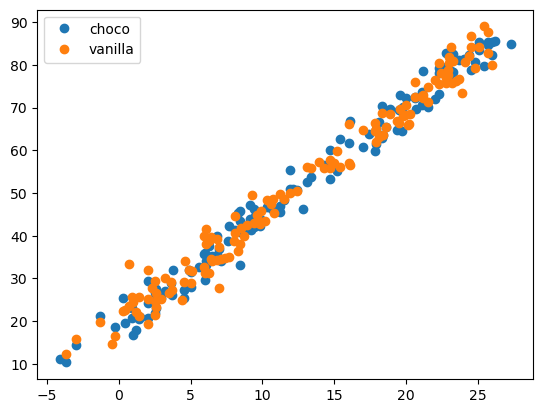

In [27]:
plt.plot(df_train.loc[df_train.type == 'choco'].temp, df_train.loc[df_train.type == 'choco'].sales, 'o', label = 'choco')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, df_train.loc[df_train.type != 'choco'].sales, 'o', label = 'vanilla')
plt.legend()
plt.show()

> 아이스크림의 타입은 판매량에 영향을 미치지 못하는 것으로 판단된다.

In [28]:
df_train.pivot_table(index = 'type', values = 'sales', aggfunc = 'mean')

,sales
type,
choco,51.120935
vanilla,51.082836


> 실제로 둘의 차이는 별로 없는 것으로 판단된다. 이에 따라 type열은 아이스크림 판매량과의 상관성이 없음을 가정, 배제하고 선형 회귀 모형으로 적합하도록 하겠다.

In [33]:
## 1
X = df_train.drop(['type', 'sales'], axis = 1)
y = df_train.sales
XX = df_test.drop('type', axis = 1)

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
df_test = df_test.assign(sales_hat = predictr.predict(XX))
df_test

,temp,type,sales_hat
0,9.6,vanilla,43.918118
1,17.4,vanilla,63.611037
2,21.1,vanilla,72.952551
3,21.5,choco,73.962444
4,23.2,choco,78.254490
...,...,...,...
115,5.1,choco,32.556818
116,12.8,vanilla,51.997264
117,22.9,choco,77.497070
118,8.4,vanilla,40.888438


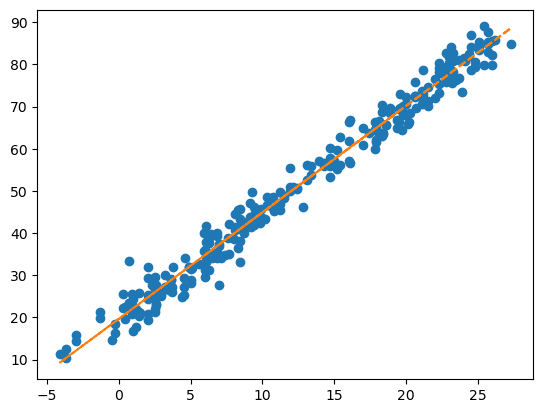

In [32]:
df_plot = df_train.assign(sales_hat = predictr.predict(X))
plt.plot(df_plot.temp, df_plot.sales, 'o')
plt.plot(df_plot.temp, df_plot.sales_hat, '--')
plt.show()

`(2)` 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [39]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

**세부지침**

1.  반응변수 ${\bf y}$를 `height`로 설정하고 나머지는 설명변수로
    설정하라.
2.  `df_test`에 `height`에 대한 예측값을 포함하는 열을 추가하라.

In [40]:
df_train

,weight,sex,height
0,71.169041,male,180.906857
1,69.204748,male,178.123281
2,49.037293,female,165.106085
3,74.472874,male,177.467439
4,74.239599,male,177.439925
...,...,...,...
275,72.105841,male,180.579718
276,72.008144,male,183.042456
277,48.589997,female,159.937014
278,80.803971,male,183.308227


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  225 non-null    float64
 1   sex     280 non-null    object 
 2   height  280 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.7+ KB


> 결측치가 존재, 먼저 결측치를 배제하고 변수 간 관계를 산점도로 파악하겠다.

In [46]:
df_train.weight.isna().sum()

55

In [49]:
df_train.loc[df_train.weight.isna() == False]

,weight,sex,height
0,71.169041,male,180.906857
1,69.204748,male,178.123281
2,49.037293,female,165.106085
3,74.472874,male,177.467439
4,74.239599,male,177.439925
...,...,...,...
275,72.105841,male,180.579718
276,72.008144,male,183.042456
277,48.589997,female,159.937014
278,80.803971,male,183.308227


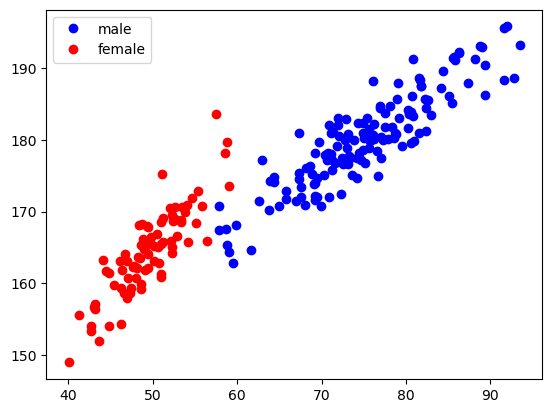

In [55]:
_df_plot = df_train.loc[df_train.weight.isna() == False]

plt.plot(_df_plot.loc[_df_plot.sex == 'male'].weight, _df_plot.loc[_df_plot.sex == 'male'].height, 'ob', label = 'male')
plt.plot(_df_plot.loc[_df_plot.sex != 'male'].weight, _df_plot.loc[_df_plot.sex != 'male'].height, 'or', label = 'female')
plt.legend()
plt.show()

> 키와 몸무게 간에는 양의 상관관계가 있어 보인다.
>
> 남성의 경우 키와 몸무게가 여성에 비해 상대적으로 높은 수준에서 분포하였다.
>
> 추가적으로 기울기 차이가 있어, 성별과 체중에 따른 교호작용이 살짝 있어보인다.

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  95 non-null     float64
 1   sex     120 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


\- test data에도 몸무게에 결측치가 존재하므로, df_train에서 행을 누락시키지 않고 평균값으로 impute하겠다. 이때, impute는 성별에 따라 달리 한다.

In [81]:
train_male = df_train.loc[df_train.sex == 'male']
train_female = df_train.loc[df_train.sex != 'male']

test_male = df_test.loc[df_test.sex == 'male']
test_female = df_test.loc[df_test.sex != 'male']

In [82]:
imputr_male = sklearn.impute.SimpleImputer(strategy = 'mean')
imputr_female = sklearn.impute.SimpleImputer(strategy = 'mean')

tr_imputed_male = imputr_male.fit_transform(train_male[['weight']])
tst_imputed_male = imputr_male.transform(test_male[['weight']])

tr_imputed_female = imputr_female.fit_transform(train_female[['weight']])
tst_imputed_female = imputr_female.transform(test_female[['weight']])

In [85]:
train_imputed = pd.concat([train_male.assign(weight = tr_imputed_male).reset_index(drop = True),
                           train_female.assign(weight = tr_imputed_female).reset_index(drop = True)], axis = 0).reset_index(drop = True)

test_imputed = pd.concat([test_male.assign(weight = tst_imputed_male).reset_index(drop = True),
                         test_female.assign(weight = tst_imputed_female).reset_index(drop = True)], axis = 0).reset_index(drop = True)

In [86]:
train_imputed

,weight,sex,height
0,71.169041,male,180.906857
1,69.204748,male,178.123281
2,74.472874,male,177.467439
3,74.239599,male,177.439925
4,80.761735,male,186.046004
...,...,...,...
275,48.593620,female,165.347161
276,44.789312,female,154.050116
277,49.567061,female,161.152907
278,48.589997,female,159.937014


\- 교호작용을 고려

In [89]:
train_inter = train_imputed.assign(sex = lambda _df : _df.sex == 'male').assign(Interaction = lambda _df : _df.weight * _df.sex)
test_inter = test_imputed.assign(sex = lambda _df : _df.sex == 'male').assign(Interaction = lambda _df : _df.weight * _df.sex)

In [90]:
train_inter

,weight,sex,height,Interaction
0,71.169041,True,180.906857,71.169041
1,69.204748,True,178.123281,69.204748
2,74.472874,True,177.467439,74.472874
3,74.239599,True,177.439925,74.239599
4,80.761735,True,186.046004,80.761735
...,...,...,...,...
275,48.593620,False,165.347161,0.000000
276,44.789312,False,154.050116,0.000000
277,49.567061,False,161.152907,0.000000
278,48.589997,False,159.937014,0.000000


\- 이제 선형 회귀로 적합하겠다.

* 교호작용 미고려

In [106]:
## 1
X = pd.get_dummies(train_imputed.drop('height', axis = 1), drop_first = True)
y = train_imputed.height
XX = pd.get_dummies(test_imputed, drop_first = True)

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
df_test = df_test.assign(height_hat = predictr.predict(XX))

In [109]:
predictr.score(X, y)

0.8543631938325703

* 교호작용 고려

In [110]:
## 1
X = train_inter.drop('height', axis = 1)
y = train_inter.height
XX = test_inter

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
df_test = df_test.assign(height_hat = predictr.predict(XX))

In [111]:
predictr.score(X, y)

0.8674339386773318

`(3)` 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [112]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_test.csv')

**세부지침**

1.  반응변수 ${\bf y}$를 `y`로 설정하고 나머지 `X1`,`X2`,`X3`,`X4`는
    설명변수로 설정하라.
2.  `df_test`에 `y`에 대한 예측값을 포함하는 열을 추가하라.

In [115]:
df_train

,X1,X2,X3,X4,y
0,0.622231,2.308226,2.422387,0.364912,14.194452
1,0.879235,0.107813,1.040124,0.781480,5.529488
2,0.238413,2.124490,2.130154,0.351936,12.462410
3,0.589695,1.675954,1.926423,0.292889,7.620280
4,0.410302,0.889643,1.202614,0.001383,-0.081749
...,...,...,...,...,...
75,0.397257,0.737639,1.014515,0.745233,1.915311
76,0.659176,-0.218337,1.074706,0.403026,4.822389
77,0.922348,0.786414,1.966189,0.945027,11.508509
78,0.999278,1.188739,1.858681,0.526907,8.190439


In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      80 non-null     float64
 1   X2      80 non-null     float64
 2   X3      80 non-null     float64
 3   X4      80 non-null     float64
 4   y       80 non-null     float64
dtypes: float64(5)
memory usage: 3.2 KB


In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      120 non-null    float64
 1   X2      120 non-null    float64
 2   X3      120 non-null    float64
 3   X4      120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [116]:
df_train.corr()

,X1,X2,X3,X4,y
X1,1.000000,0.076188,0.081018,-0.016346,0.022207
X2,0.076188,1.000000,0.908744,-0.076805,0.799140
X3,0.081018,0.908744,1.000000,-0.083198,0.912513
X4,-0.016346,-0.076805,-0.083198,1.000000,-0.027986
y,0.022207,0.799140,0.912513,-0.027986,1.000000


> X2와 X3의 경우 y와의 상관성이 높으나, X1과 X4는 낮은 것 같다.

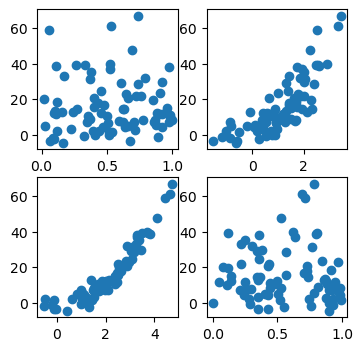

In [120]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (4,4))
ax1.plot(df_train.X1, df_train.y, 'o')
ax2.plot(df_train.X2, df_train.y, 'o')
ax3.plot(df_train.X3, df_train.y, 'o')
ax4.plot(df_train.X4, df_train.y, 'o')
plt.show()

> 두번째와 세번째의 경우 약간 비선형인 것 같긴 한데, 관계가 있어보이고, 첫번째와 네번째의 경우 전혀 관련이 없어 보인다... 따라서 배제하고 풀이하도록 하겠다.

\- 약간 비선형이므로 tree 모듈을 사용하고 싶은데, tree의 경우 기존 설명변수의 범위 바깥의 자료가 들어오면 성능이 떨어지므로 설명변수가 가지는 값의 범위를 파악하고자 한다.

In [127]:
train_drop = df_train.drop(['X1', 'X4'], axis = 1)
test_drop = df_test.drop(['X1', 'X4'], axis = 1)

In [128]:
train_drop.describe()

,X2,X3,y
count,80.000000,80.000000,80.000000
mean,1.074112,2.091978,15.791614
std,1.056570,1.153869,15.398161
min,-1.533994,-0.537489,-4.710236
25%,0.482950,1.300526,5.010325
50%,1.099683,2.082149,11.834754
75%,1.807887,2.858532,22.036426
max,3.456263,4.727418,66.971687


In [129]:
test_drop.describe()

,X2,X3
count,120.000000,120.000000
mean,1.062025,2.061230
std,0.944078,0.900320
min,-1.407318,0.080494
25%,0.414749,1.390392
50%,1.094657,2.118710
75%,1.726440,2.632981
max,3.427092,3.969813


> min, max에 집중하여 보았을 때, test data의 설명변수 데이터 범위가 train data의 설명변수 데이터 범위보다 작은 것을 알 수 있다. 따라서 의사결정나무 모형을 사용하여 언더피팅을 방지하고자 한다.

In [205]:
## 1
X = train_drop.drop('y', axis = 1)
y = train_drop.y
XX = test_drop

## 2
predictr = sklearn.tree.DecisionTreeRegressor(max_depth = 5, min_samples_split = 8)

## 3
predictr.fit(X, y)
predictr.score(X, y)

0.9723121151784222

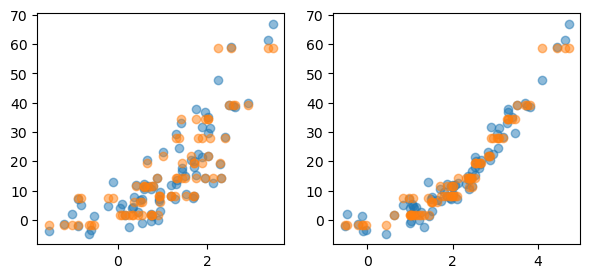

In [206]:
plot_df = train_drop.assign(y_hat = predictr.predict(X))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7,3))
ax1.plot(plot_df.X2, plot_df.y, 'o', alpha = 0.5)
ax1.plot(plot_df.X2, plot_df.y_hat, 'o', alpha = 0.5)
ax2.plot(plot_df.X3, plot_df.y, 'o', alpha = 0.5)
ax2.plot(plot_df.X3, plot_df.y_hat, 'o', alpha = 0.5)

> 하이퍼 파라미터 조정 결과 이게 최선인 것 같다.

In [209]:
df_test = df_test.assign(y_hat = predictr.predict(XX))
df_test

,X1,X2,X3,X4,y_hat
0,0.848150,2.120672,2.464867,0.418109,14.282168
1,0.577140,2.339529,2.704477,0.277340,19.526128
2,0.968286,1.570282,2.236010,0.791880,14.282168
3,0.065605,1.332800,1.591895,0.175372,6.296331
4,0.997962,2.216314,3.020515,0.932561,27.990198
...,...,...,...,...,...
115,0.543678,1.008793,2.192418,0.751022,14.282168
116,0.693956,1.978183,2.719313,0.267207,19.526128
117,0.405942,0.997256,1.913545,0.364545,8.341820
118,0.160230,0.253617,1.435839,0.139073,1.811289


# `3`. 연구 (20점)

아래의 코드를 이용하여 자료를 불러오라.

In [4]:
np.random.seed(42)
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)

아래의 절차에 따라 자료를 연구하라. 결과를 해석하라.

1.  종속변수 ${\bf y}$를 `employment_score`로 설정하고 나머지는
    설명변수로 설정하라.
2.  `sklearn.linear_model.Ridge`를 이용하여
    $\alpha = [10^1, 10^{1.5}, 10^2, 10^{2.5}, \dots, 10^{9}]$에 대해
    predictor를 생성하라.
3.  $\alpha$의 변화에 따른 train score 와 test score 의 변화를
    시각화하라.
4.  $\alpha$에 변화에 따른 `predictor`가 학습한 coefficient값
    (`predictor.coef_`) 들의 분산변화와 L2-penalty를 시각화하라.

In [5]:
df_train

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
5,2.262749,1.846885,65,62.502790,73.134613,64.360831,58.777477,66.206707,70.669449,64.183071,...,48.441803,72.759500,75.771892,58.956862,75.497749,79.442029,42.961724,52.603797,69.965719,52.984800
116,9.096651,1.931363,720,713.210948,719.723461,716.746479,726.086248,721.486952,715.443334,711.958759,...,716.040427,705.988496,713.179898,719.909498,727.729947,712.164139,706.614627,728.094559,693.140140,720.546839
45,4.900907,0.620751,500,510.143426,510.426519,490.546881,480.966138,506.589557,493.994362,508.826508,...,490.990531,498.553796,503.815444,481.233997,512.084290,507.061189,504.204157,506.177817,508.311294,492.836403
16,3.124178,1.687009,245,241.930504,231.088361,242.841626,250.550422,232.610988,250.481611,237.465725,...,235.199349,239.776658,242.887419,243.789171,253.403209,259.951170,236.468293,240.177475,239.875277,262.754376
462,3.370277,2.520002,155,144.907179,152.025003,155.503279,160.112115,154.801705,158.511024,159.696077,...,164.556802,160.864244,162.569355,151.233279,175.592764,148.439060,164.924838,149.588570,157.033033,158.836727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,12.450738,1.814552,875,862.521982,887.428440,865.344086,877.957203,874.566101,892.082031,876.393643,...,885.945067,870.310986,861.663281,875.313474,887.824446,871.447148,848.619827,857.649246,877.624663,875.269646
270,11.256494,2.265221,755,757.203635,755.786330,754.584238,749.427471,750.340030,751.803514,771.473687,...,757.448921,759.286661,748.688886,740.477434,744.936442,749.221488,738.327284,758.341251,753.449301,753.577951
348,1.686544,0.754988,165,167.985632,185.655105,158.857498,161.139670,146.588192,175.295005,172.529708,...,169.726146,152.046930,149.506526,155.756903,170.380529,151.111078,161.384328,154.123144,160.846526,138.621796
435,9.778239,4.304144,540,539.308063,546.275662,565.186574,547.520174,538.324726,541.254904,560.299099,...,531.315216,553.368651,555.508530,529.868080,540.766161,539.005222,545.931294,545.409399,553.595907,548.334308


> toeic0~toeic499까지는 모두 값이 유사한 것으로 보아 공선성이 있는 것으로 예측된다.

In [6]:
np.linspace(1, 9, 17)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. ])

In [7]:
predictrs = [sklearn.linear_model.Ridge(alpha = 10**alpha) for alpha in np.linspace(1, 9, 17)]

In [8]:
## 1
X = df_train.drop('employment_score', axis = 1)
y = df_train.employment_score
XX = df_test.drop('employment_score', axis = 1)
yy = df_test.employment_score

## 2 pass

## 3
for predictr in predictrs :
    predictr.fit(X, y)

In [9]:
train_score = np.array([predictrs[i].score(X, y) for i in range(17)])
test_score = np.array([predictrs[i].score(XX, yy) for i in range(17)])

In [10]:
score_df = pd.DataFrame(train_score, columns = ['train_score'])
score_df = score_df.assign(test_score = test_score)
score_df = score_df.assign(alpha = np.linspace(1, 9, 17))

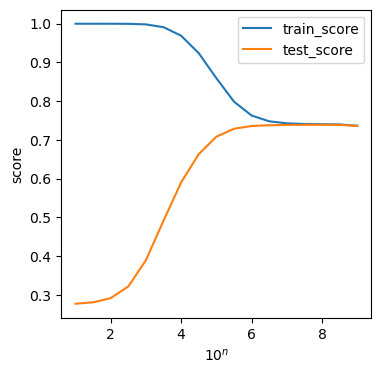

In [11]:
fig, ax1 = plt.subplots(1, figsize = (4,4))
ax1.plot(score_df.alpha, score_df.train_score, label = 'train_score')
ax1.plot(score_df.alpha, score_df.test_score, label = 'test_score')
ax1.legend()
plt.xlabel(r'$10^n$')
plt.ylabel('score')
plt.show()

> alpha의 값이 커짐에 따라 train_score의 값은 작아지고, test_score의 값은 커져 둘은 수렴하고 있다.

In [12]:
[((predictr.coef_)**2).sum() for predictr in predictrs]

[0.05459046135185493,
 0.05416615857501014,
 0.0528778303671466,
 0.049265427039218664,
 0.04096235179494019,
 0.027788800950067555,
 0.014586074056778402,
 0.005727399355171508,
 0.0015753272842844368,
 0.0002884291984195927,
 3.817314619637788e-05,
 4.406531374358326e-06,
 6.345674763282583e-07,
 2.424987351453352e-07,
 2.0081106979685034e-07,
 1.904764117391586e-07,
 1.718822985143507e-07]

In [13]:
[(predictr.coef_).var()*501 for predictr in predictrs]

[0.054478286654102266,
 0.05405484768063996,
 0.05276914283608255,
 0.049164099822911034,
 0.04087796813323446,
 0.027731375304905985,
 0.014555752021893272,
 0.0057153030649774094,
 0.001571801076192678,
 0.00028758997437730143,
 3.78767798403453e-05,
 4.192245481244335e-06,
 4.3275422268403355e-07,
 4.363828253004091e-08,
 4.581266753377465e-09,
 7.518248562419225e-10,
 3.6608120637075215e-10]

In [15]:
score_df

,penalty,var,alpha
0,5.459046e-02,5.447829e-02,1.0
1,5.416616e-02,5.405485e-02,1.5
2,5.287783e-02,5.276914e-02,2.0
3,4.926543e-02,4.916410e-02,2.5
4,4.096235e-02,4.087797e-02,3.0
5,2.778880e-02,2.773138e-02,3.5
6,1.458607e-02,1.455575e-02,4.0
7,5.727399e-03,5.715303e-03,4.5
8,1.575327e-03,1.571801e-03,5.0
9,2.884292e-04,2.875900e-04,5.5


In [24]:
score_df = pd.DataFrame([((predictr.coef_)**2).sum() for predictr in predictrs], columns = ['penalty'])
score_df = score_df.assign(var = [(predictr.coef_).var()*501 for predictr in predictrs])
score_df = score_df.assign(alpha = np.linspace(1, 9, 17))

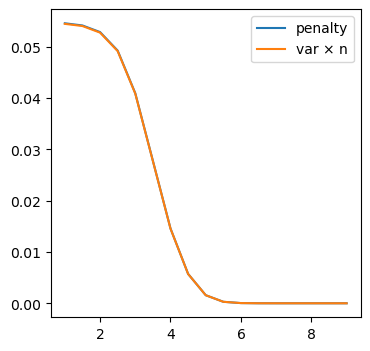

In [26]:
fig, ax1 = plt.subplots(1, figsize = (4,4))
ax1.plot(score_df.alpha, score_df.penalty, label = 'penalty')
ax1.plot(score_df.alpha, score_df['var'], label = 'var × n')
ax1.legend()

In [19]:
score_df.var ## 이거 분산 내놓는 메소드라 이렇게 됨...

<bound method NDFrame._add_numeric_operations.<locals>.var of          penalty           var  alpha
0   5.459046e-02  5.447829e-02    1.0
1   5.416616e-02  5.405485e-02    1.5
2   5.287783e-02  5.276914e-02    2.0
3   4.926543e-02  4.916410e-02    2.5
4   4.096235e-02  4.087797e-02    3.0
5   2.778880e-02  2.773138e-02    3.5
6   1.458607e-02  1.455575e-02    4.0
7   5.727399e-03  5.715303e-03    4.5
8   1.575327e-03  1.571801e-03    5.0
9   2.884292e-04  2.875900e-04    5.5
10  3.817315e-05  3.787678e-05    6.0
11  4.406531e-06  4.192245e-06    6.5
12  6.345675e-07  4.327542e-07    7.0
13  2.424987e-07  4.363828e-08    7.5
14  2.008111e-07  4.581267e-09    8.0
15  1.904764e-07  7.518249e-10    8.5
16  1.718823e-07  3.660812e-10    9.0>